In [56]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNetCV, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV, ElasticNet, Lasso,  BayesianRidge, SGDRegressor, LassoLars
#import xgboost
from sklearn.isotonic import IsotonicRegression
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
import seaborn as sns
import matplotlib.pyplot as plt

## Read in the data

In [5]:
means = pd.read_csv('means.csv')

In [6]:
data = pd.read_csv('all_data.csv')

In [7]:
data.head()

,Unnamed: 0,0,1,col1,col2,col3,col4,col5,col6,col7,...,col291,col292,col293,col294,col295,col296,col297,col298,col299,col300
0,0,AF1.jpg,2.333333,14753.306329,-10537.313323,4796.123493,4664.160051,-848.076282,-4213.488053,-6297.174506,...,-589.001593,305.956515,170.343205,215.295875,-120.854910,-90.750822,102.993594,237.960580,-58.396608,-134.391637
1,1,AF10.jpg,3.433333,-877.669551,-1611.237335,-6767.412479,12671.028734,-4133.032706,-4.126768,-3511.761653,...,74.113228,375.218033,389.589442,-20.580012,31.393664,188.063343,169.272286,431.004629,-36.523396,-274.955104
2,2,AF100.jpg,2.900000,2981.296490,-1145.419869,812.762690,-3604.079572,-3597.394101,-913.488351,-145.312380,...,34.024408,-105.080011,-148.214423,-211.059903,55.151686,342.184362,70.153276,-40.115222,-21.838561,-129.367113
3,3,AF1000.jpg,3.966667,8788.184795,-2737.839489,603.520709,2934.703438,-12111.143812,1544.994762,5216.692118,...,-12.944943,-46.992793,240.276136,-119.551204,-152.961971,28.813398,-266.144072,40.500406,-147.087239,13.409716
4,4,AF1001.jpg,3.733333,-2415.484826,2987.243092,-3833.612855,169.538238,-3573.068735,7116.482720,5758.109405,...,-266.388857,145.086674,523.457912,27.281604,210.957396,186.067448,-227.734618,-470.221368,24.514891,128.060678


In [8]:
# make sure we have a mean for every observation
print(means.shape, data.shape)

(5500, 3) (5500, 303)


In [9]:
# lets see exactly which column we want and those we dont want
means.head()

,Unnamed: 0,0,1
0,0,AF1.jpg,2.333333
1,1,AF10.jpg,3.433333
2,2,AF100.jpg,2.900000
3,3,AF1000.jpg,3.966667
4,4,AF1001.jpg,3.733333


In [10]:
means.columns = ['first', 'id', 'target']

In [11]:
means = means.drop('first', axis=1)

In [12]:
means.head()

,id,target
0,AF1.jpg,2.333333
1,AF10.jpg,3.433333
2,AF100.jpg,2.900000
3,AF1000.jpg,3.966667
4,AF1001.jpg,3.733333


In [13]:
data.rename(columns={'0':'file',
                          '1':'mean'}, 
                 inplace=True)
data = data.drop('Unnamed: 0', axis=1)

In [14]:
data.head()

,file,mean,col1,col2,col3,col4,col5,col6,col7,col8,...,col291,col292,col293,col294,col295,col296,col297,col298,col299,col300
0,AF1.jpg,2.333333,14753.306329,-10537.313323,4796.123493,4664.160051,-848.076282,-4213.488053,-6297.174506,671.269266,...,-589.001593,305.956515,170.343205,215.295875,-120.854910,-90.750822,102.993594,237.960580,-58.396608,-134.391637
1,AF10.jpg,3.433333,-877.669551,-1611.237335,-6767.412479,12671.028734,-4133.032706,-4.126768,-3511.761653,-2580.398078,...,74.113228,375.218033,389.589442,-20.580012,31.393664,188.063343,169.272286,431.004629,-36.523396,-274.955104
2,AF100.jpg,2.900000,2981.296490,-1145.419869,812.762690,-3604.079572,-3597.394101,-913.488351,-145.312380,2368.152970,...,34.024408,-105.080011,-148.214423,-211.059903,55.151686,342.184362,70.153276,-40.115222,-21.838561,-129.367113
3,AF1000.jpg,3.966667,8788.184795,-2737.839489,603.520709,2934.703438,-12111.143812,1544.994762,5216.692118,-2348.226729,...,-12.944943,-46.992793,240.276136,-119.551204,-152.961971,28.813398,-266.144072,40.500406,-147.087239,13.409716
4,AF1001.jpg,3.733333,-2415.484826,2987.243092,-3833.612855,169.538238,-3573.068735,7116.482720,5758.109405,5181.613324,...,-266.388857,145.086674,523.457912,27.281604,210.957396,186.067448,-227.734618,-470.221368,24.514891,128.060678


In [15]:
y = data['mean']
X = data.drop('mean', axis=1).drop('file', axis=1)

In [16]:
# get a final test set that I will do absolutely no training on, merely once I find a model that I like
X_temp, X_final_test, y_temp, y_final_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [17]:
# create training and testing sets for modelling
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.35, random_state=42)

In [18]:
X_train.shape

(3217, 300)

In [79]:
X_test.shape

(1733, 300)

In [81]:
y_test

4584    3.983333
5248    2.550000
500     3.850000
377     2.916667
2932    4.600000
5226    3.533333
5007    2.766667
2589    3.166667
1218    2.133333
4585    3.316667
899     3.800000
2860    4.383333
2973    3.150000
1689    2.233333
4766    2.766667
1009    2.966667
4016    2.850000
1410    2.683333
1070    3.616667
3327    2.733333
5412    3.833333
2367    2.700000
3293    2.500000
1135    2.416667
1076    1.816667
1581    2.783333
511     4.000000
4337    2.266667
4554    3.866667
1028    2.300000
          ...   
4348    2.183333
3072    4.400000
1753    2.250000
405     2.933333
2452    2.600000
3940    2.183333
1995    3.016667
1011    3.383333
4701    3.716667
3756    3.083333
1003    4.150000
2710    4.200000
4611    1.333333
1884    3.516667
5299    3.933333
3670    1.983333
3550    2.216667
3203    2.250000
4573    3.883333
3274    2.250000
1336    2.783333
475     3.500000
2301    3.900000
483     3.216667
4013    2.650000
693     3.900000
1138    2.583333
4753    4.2833

In [20]:
y.describe()

count    5500.000000
mean        2.990891
std         0.688112
min         1.016667
25%         2.500000
50%         2.833333
75%         3.533333
max         4.750000
Name: mean, dtype: float64

# gonna test some models

In [21]:
def score_model(preds):
    print('Mean squared error:', mean_squared_error(y_test,preds))
    #print('Mean absolute error:', mean_absolute_error(y_test,preds))
    print('Explained variance score(best 1.0):', explained_variance_score(y_test,preds))
    print('r2 score(best 1.0):', r2_score(y_test,preds))

In [130]:
def score_model_final(preds):
    print('Mean squared error:', mean_squared_error(y_final_test,preds))
    #print('Mean absolute error:', mean_absolute_error(y_test,preds))
    print('Explained variance score(best 1.0):', explained_variance_score(y_final_test,preds))
    print('r2 score(best 1.0):', r2_score(y_final_test,preds))

In [22]:
# Code I found online to do multiple models and average them
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)  

In [23]:
reg = LinearRegression().fit(X_train, y_train)
preds = reg.predict(X_test)
score_model(preds)

Mean squared error: 0.38174197918818653
Explained variance score(best 1.0): 0.20980097223482175
r2 score(best 1.0): 0.20749216915804103


In [24]:
enetcv = ElasticNetCV().fit(X_train, y_train)
preds = enetcv.predict(X_test)
score_model(preds)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Mean squared error: 0.35436968383256745
Explained variance score(best 1.0): 0.2660326498919724
r2 score(best 1.0): 0.26431787762106873


In [25]:
enet = ElasticNet().fit(X_train, y_train)
preds = enet.predict(X_test)
score_model(preds)

Mean squared error: 0.37336747479972315
Explained variance score(best 1.0): 0.227123678874957
r2 score(best 1.0): 0.22487789215709797


In [26]:
krr = KernelRidge().fit(X_train, y_train)
preds = krr.predict(X_test)
score_model(preds)

Mean squared error: 11.195010992678052
Explained variance score(best 1.0): -0.9866080968554163
r2 score(best 1.0): -22.241179544693175


In [27]:
rando_forest = RandomForestRegressor().fit(X_train, y_train)
preds = rando_forest.predict(X_test)
score_model(preds)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Mean squared error: 0.3868171619678323
Explained variance score(best 1.0): 0.19810540129878484
r2 score(best 1.0): 0.1969559370559888


In [77]:
gradient_boost = GradientBoostingRegressor().fit(X_train, y_train)
preds = gradient_boost.predict(X_test)
score_model(preds)
preds[:5]

Mean squared error: 0.3236629902676737
Explained variance score(best 1.0): 0.32901490336709294
r2 score(best 1.0): 0.32806589705868516


array([4.05786621, 2.69572799, 3.45491503, 3.28744601, 2.96979294])

In [76]:
SGD = SGDRegressor().fit(X_train, y_train)
preds = SGD.predict(X_test)
score_model(preds)

Mean squared error: 4.681255111820723e+34
Explained variance score(best 1.0): -9.712067851396304e+34
r2 score(best 1.0): -9.718426415078642e+34


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [30]:
MLP = MLPRegressor().fit(X_train, y_train)
preds = MLP.predict(X_test)
score_model(preds)

Mean squared error: 53182.643067260804
Explained variance score(best 1.0): -110407.34913567499
r2 score(best 1.0): -110407.76663684809


In [31]:
ave_4 = AveragingModels(models = (gradient_boost, enet, reg, rando_forest))
ave_4.fit(X_train, y_train)
preds = ave_4.predict(X_test)
score_model(preds)

Mean squared error: 0.32619978364990926
Explained variance score(best 1.0): 0.3248075512652572
r2 score(best 1.0): 0.32279943769541286


In [32]:
# # XGBoost
# XGB = xgboost.sklearn.XGBModel(colsample_bytree=0.4603, gamma=0.0468, 
#                               learning_rate=0.05, max_depth=3, 
#                               min_child_weight=1.7817, n_estimators=2200,
#                               reg_alpha=0.4640, reg_lambda=0.8571,
#                               subsample=0.5213, silent=1,
#                               random_state =7, nthread = -1)#n_estimators=360, max_depth=2, learning_rate=0.1)
# XGB.fit(X_train,y_train)
# preds = XGB.predict(X_test)
# score_model(preds)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


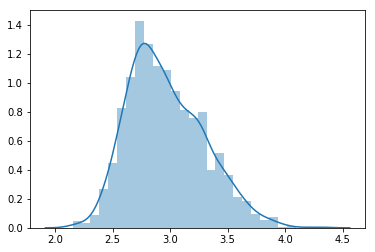

In [33]:
sns.distplot(preds)

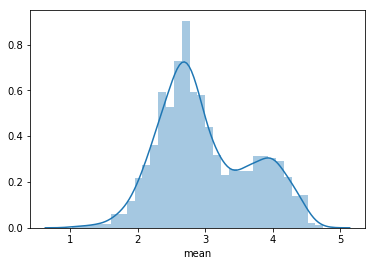

In [34]:
sns.distplot(data['mean'])

## As you can see, this is no bueno. Let's do a grid search and see if we can do better.

### Random Forest Regressor with GridSearch

In [85]:
#Now we will create a random forest
param_dictionary = {"n_estimators": [400, 500, 600], "max_depth":[2,4,6]}
RFC = RandomForestRegressor(n_jobs=-1, max_depth=3)
gs = GridSearchCV(RFC, param_dictionary, n_jobs=1, verbose=2, cv=2)
gs.fit(X_train, y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] max_depth=2, n_estimators=400 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=2, n_estimators=400, total=   8.3s
[CV] max_depth=2, n_estimators=400 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.4s remaining:    0.0s


[CV] .................... max_depth=2, n_estimators=400, total=   7.4s
[CV] max_depth=2, n_estimators=500 ...................................
[CV] .................... max_depth=2, n_estimators=500, total=   8.6s
[CV] max_depth=2, n_estimators=500 ...................................
[CV] .................... max_depth=2, n_estimators=500, total=   8.6s
[CV] max_depth=2, n_estimators=600 ...................................
[CV] .................... max_depth=2, n_estimators=600, total=  11.6s
[CV] max_depth=2, n_estimators=600 ...................................
[CV] .................... max_depth=2, n_estimators=600, total=  11.8s
[CV] max_depth=4, n_estimators=400 ...................................
[CV] .................... max_depth=4, n_estimators=400, total=  13.1s
[CV] max_depth=4, n_estimators=400 ...................................
[CV] .................... max_depth=4, n_estimators=400, total=  12.9s
[CV] max_depth=4, n_estimators=500 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  5.1min finished


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'n_estimators': [400, 500, 600], 'max_depth': [2, 4, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [86]:
gs.best_params_

{'max_depth': 6, 'n_estimators': 600}

In [88]:
#train the model on all of our data
clf = RandomForestRegressor(n_jobs=-1, max_depth=6, n_estimators=600, verbose=1)
clf.fit(X, y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  1.8min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

In [89]:
preds = clf.predict(X_test)
score_model(preds)

Mean squared error: 0.2971080849947761
Explained variance score(best 1.0): 0.38351907778361594
r2 score(best 1.0): 0.38319467912449845


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:    0.1s finished


### GradientBoost with GridSearch

In [108]:
param_dictionary = {"n_estimators": [100, 200, 300, 400], "max_depth":[2,3,4,5,6]}
gradient_boost = GradientBoostingRegressor()
gs = GridSearchCV(gradient_boost, param_dictionary, n_jobs=1, verbose=2, cv=2)
gs.fit(X_train, y_train)

Fitting 2 folds for each of 20 candidates, totalling 40 fits
[CV] max_depth=2, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=2, n_estimators=100, total=   1.9s
[CV] max_depth=2, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV] .................... max_depth=2, n_estimators=100, total=   2.0s
[CV] max_depth=2, n_estimators=200 ...................................
[CV] .................... max_depth=2, n_estimators=200, total=   3.7s
[CV] max_depth=2, n_estimators=200 ...................................
[CV] .................... max_depth=2, n_estimators=200, total=   3.8s
[CV] max_depth=2, n_estimators=300 ...................................
[CV] .................... max_depth=2, n_estimators=300, total=   5.6s
[CV] max_depth=2, n_estimators=300 ...................................
[CV] .................... max_depth=2, n_estimators=300, total=   5.7s
[CV] max_depth=2, n_estimators=400 ...................................
[CV] .................... max_depth=2, n_estimators=400, total=   7.5s
[CV] max_depth=2, n_estimators=400 ...................................
[CV] .................... max_depth=2, n_estimators=400, total=   7.6s
[CV] max_depth=3, n_estimators=100 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  8.0min finished


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'n_estimators': [100, 200, 300, 400], 'max_depth': [2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [109]:
gs.best_params_

{'max_depth': 3, 'n_estimators': 400}

In [111]:
dlf = GradientBoostingRegressor(n_estimators=400, max_depth=3)
dlf.fit(X,y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [112]:
preds = dlf.predict(X_test)
score_model(preds)

Mean squared error: 0.09434372120634231
Explained variance score(best 1.0): 0.804152767979208
r2 score(best 1.0): 0.8041395971022129


In [131]:
preds = dlf.predict(X_final_test)
score_model_final(preds)

Mean squared error: 0.08849149014140982
Explained variance score(best 1.0): 0.8169990111545576
r2 score(best 1.0): 0.8169873022235123


This was by far our best model so we will use this model to rate the images.

## Individual Pictures

In [113]:
people = pd.read_csv("ind_pics.csv")

In [124]:
cols = list(people.columns)
cols.remove("Unnamed: 0")
cols.remove("Image")

In [125]:
X_people = people.loc[:,cols]

In [126]:
predictions = dlf.predict(X_people)

In [129]:
for i in range(len(predictions)):
    print(i, predictions[i])

0 3.628143372625039
1 3.2482053595976543
2 3.8801038690960095
3 2.4118645067139446
4 3.459536457405707
5 3.2759728912840274
6 2.7621746553344795
7 3.2144714711280127
8 3.237180028018885
9 2.5771159441837357
10 2.8934176395933067
11 3.2263624669007074
12 2.742126773857901
13 3.4427201444174345
14 3.1273293340651835
15 3.3346764059669356
16 3.128966299286982
17 3.0323293283142125
18 3.78106137444032
19 3.3367566243940527
20 3.2948053925069627
21 3.322355375581529
22 3.510211335808325
23 2.710485001447852
24 3.8957894086608333
25 3.4371401442168112
26 2.3774394116513227
27 3.354803990496565


In [139]:
more_people = pd.read_csv("ind_pics2.csv")

In [140]:
X_more_people = more_people.loc[:,cols]

In [143]:
predictions = dlf.predict(X_more_people)

In [144]:
for i in range(len(predictions)):
    print(i, predictions[i])

0 3.312306400297343
1 2.8722267407982778
2 3.1435166963234638
3 3.389756205281075
4 3.268130069530052
5 2.81745334560161
6 2.959538096971375
7 3.1421718263392795
8 2.8119999879655486
9 4.107876498594492
10 3.5916082915065237
11 3.2640041644121225
12 3.153527286862698
13 3.1277590927946224
14 3.983706948580847
15 3.048884420123973
16 3.874708018318998
17 3.2454855740360014
